In [ ]:
import os, sys
from google.colab import drive
drive.mount ('/content/drive')

os.chdir('/content/drive/My Drive/Colab Notebooks/opencv')
sys.path.append('/content/drive/My Drive/Colab Notebooks/opencv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/IMDB Dataset.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import re
import string



In [ ]:
# Preprocess text function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [ ]:


# Apply preprocessing
nltk.download('stopwords')
data['review'] = data['review'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

# Encode sentiment labels
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

In [ ]:
# Split the dataset
X = data['review']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Train and evaluate models
models = {
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}





In [ ]:
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    print(f'{name} Model:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
    print('-'*30)

Naive Bayes Model:
Accuracy: 0.8507
Confusion Matrix:
[[4202  759]
 [ 734 4305]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

------------------------------
Random Forest Model:
Accuracy: 0.8514
Confusion Matrix:
[[4285  676]
 [ 810 4229]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4961
           1       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

------------------------------


In [ ]:
# Import the best model based on the earlier evaluation
best_model_name = 'SVM'  # Replace with the actual best model name based on your results
best_model = models[best_model_name]






In [ ]:
# Function to predict sentiment for a new review
def predict_sentiment(review):
    # Preprocess the input review
    processed_review = preprocess_text(review)

In [ ]:

    # Transform the review using the same TF-IDF vectorizer
    review_tfidf = vectorizer.transform([processed_review])


In [ ]:
  # Map the prediction back to sentiment label
    sentiment_label = 'positive' if prediction[0] == 1 else 'negative'
    return sentiment_label

In [ ]:

# Example usage
new_review = "bad movie"
predicted_sentiment = predict_sentiment(new_review)
print(f'The sentiment of the review is: {predicted_sentiment}')

In [ ]:


    # Predict sentiment using the best model
    prediction = best_model.predict(review_tfidf)

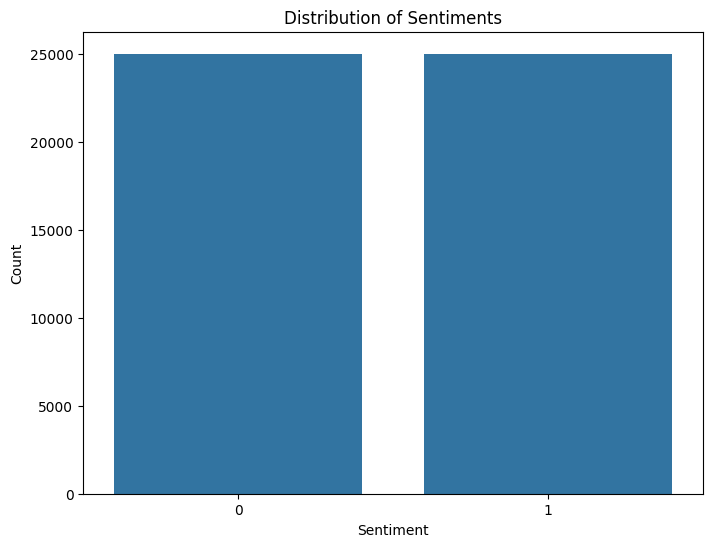

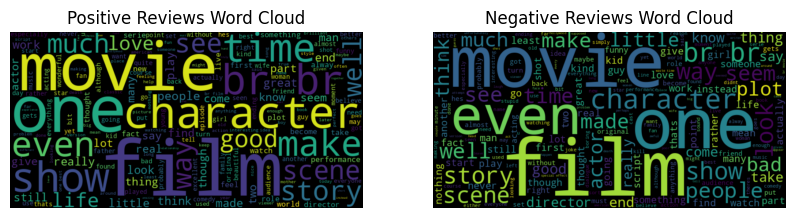

In [ ]:
# prompt: i need 2 visualization based on this dataset

# Visualization 1: Distribution of Sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Visualization 2: Word Cloud for Positive and Negative Reviews
from wordcloud import WordCloud

# Separate positive and negative reviews
positive_reviews = data[data['sentiment'] == 1]['review']
negative_reviews = data[data['sentiment'] == 0]['review']

# Create word clouds
positive_wordcloud = WordCloud(width=800, height=400).generate(' '.join(positive_reviews))
negative_wordcloud = WordCloud(width=800, height=400).generate(' '.join(negative_reviews))

# Display word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()
